1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [228]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import matplotlib.pyplot as plt

In [229]:
seed = 2054778
np.random.seed(seed)

In [230]:
size=1200
x1 = np.random.normal(loc=0, scale=1, size=size)
x2 = x1 + np.random.normal(loc=0, scale=3, size=size)
x3 = 2*x1 + x2

In [231]:
# Generating the dataset
data = pd.DataFrame([x1, x2, x3])
cov_matrix = np.cov(data)
cov_matrix

array([[ 0.98506745,  0.83519979,  2.80533469],
       [ 0.83519979,  9.14214828, 10.81254786],
       [ 2.80533469, 10.81254786, 16.42321724]])

In [232]:
# Taking a peak at the data
data

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,-1.194624,1.393093,0.621671,1.109586,-0.845344,0.309373,0.598129,-0.919791,-0.213882,-0.603269,...,0.521897,1.888482,-0.184005,0.726701,0.350184,1.495371,0.202667,1.952311,-1.151982,0.416607
1,-2.846154,-1.665427,-1.275064,-5.693948,0.431943,-0.045829,0.218108,-0.064463,0.955765,1.348375,...,-2.189930,-1.550348,-0.224072,-0.102283,-2.425491,-0.074872,3.442972,4.580440,-4.535627,3.812834
2,-5.235403,1.120759,-0.031723,-3.474776,-1.258746,0.572918,1.414366,-1.904045,0.528002,0.141836,...,-1.146135,2.226617,-0.592081,1.351118,-1.725123,2.915871,3.848305,8.485061,-6.839590,4.646048


In [233]:
# Checking the covariance matrix with the definition
np.allclose((data.dot(data.T))/(size-1), cov_matrix, 1e-2)

True

In [234]:
# Finding the eigenvalues and the eigenvectors with linalg.eig
l, V = np.linalg.eig(cov_matrix)

In [235]:
# Finding the eigenvalues and the eigenvectors with linalg.svd
U, spectrum, Vt = np.linalg.svd(data)
l_svd = spectrum**2/(size-1)
V_svd = U

In [236]:
#Looking at the values
print('The eigenvalues with eig are: \n', l)
print('\n The eigenvectors with eig are: \n', V)
print('\n The eigenvalues with eig are: \n', l_svd)
print('\n The eigenvectors with eig are: \n', V_svd)

The eigenvalues with eig are: 
 [2.45172327e+01 1.64433399e-15 2.03320027e+00]

 The eigenvectors with eig are: 
 [[-0.11691446 -0.81649658  0.56538867]
 [-0.57554241 -0.40824829 -0.70857905]
 [-0.80937133  0.40824829  0.42219828]]

 The eigenvalues with eig are: 
 [2.45904831e+01 2.03337157e+00 2.18534116e-31]

 The eigenvectors with eig are: 
 [[-0.11682553  0.56540705 -0.81649658]
 [-0.57565386 -0.70848851 -0.40824829]
 [-0.80930491  0.42232558  0.40824829]]


In [237]:
#sorting the eigenvalues in descending order (and the eigenvectors with them)
sorting = np.argsort(l)
sorting_svd = np.argsort(l_svd)
l = l[sorting[::-1]]
V = V[:,sorting[::-1]]
l_svd = l_svd[sorting_svd[::-1]]
V_svd = V_svd[:,sorting_svd[::-1]]

In [238]:
#Looking at the sorted values
print('The eigenvalues with eig are: \n', l)
print('\n The eigenvectors with eig are: \n', V)
print('\n The eigenvalues with eig are: \n', l_svd)
print('\n The eigenvectors with eig are: \n', V_svd)

The eigenvalues with eig are: 
 [2.45172327e+01 2.03320027e+00 1.64433399e-15]

 The eigenvectors with eig are: 
 [[-0.11691446  0.56538867 -0.81649658]
 [-0.57554241 -0.70857905 -0.40824829]
 [-0.80937133  0.42219828  0.40824829]]

 The eigenvalues with eig are: 
 [2.45904831e+01 2.03337157e+00 2.18534116e-31]

 The eigenvectors with eig are: 
 [[-0.11682553  0.56540705 -0.81649658]
 [-0.57565386 -0.70848851 -0.40824829]
 [-0.80930491  0.42232558  0.40824829]]


In [239]:
cov_matrix

array([[ 0.98506745,  0.83519979,  2.80533469],
       [ 0.83519979,  9.14214828, 10.81254786],
       [ 2.80533469, 10.81254786, 16.42321724]])

In [240]:
V.dot(np.diag(l).dot(V.T))

array([[ 0.98506745,  0.83519979,  2.80533469],
       [ 0.83519979,  9.14214828, 10.81254786],
       [ 2.80533469, 10.81254786, 16.42321724]])

In [241]:
# Checking if the the eigenvectors  and eigenvalues yelded by the two methods coincide
print(np.allclose(V, V_svd, 1e-3), np.allclose(l, l_svd, 1e-2))


True True


In [242]:
# From here we procede only with the values given by the eig method
percentages = l/cov_matrix.trace()
print(f'The percentage of the variability for each feature is: ', percentages)

The percentage of the variability for each feature is:  [9.23421201e-01 7.65787991e-02 6.19324738e-17]


In [243]:
# Here we reduce the dimenionalty of the system, we look for the features to drop to retain 99% of the variability
first_to_drop = 0
for i in range(len(percentages)):
    if np.cumsum(percentages[::-1][:i+1])[-1] > 1e-2:
        first_to_drop = len(percentages)-i
        break
print('The first index to drop is: ', first_to_drop)

The indexes to drop are:  2


In [244]:

datap = pd.DataFrame(np.dot(V.T, data))
datap

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,6.015136e+00,-1.114589e-01,6.868466e-01,5.959766e+00,8.690243e-01,-4.734970e-01,-1.340208e+00,1.685718e+00,-9.524275e-01,-8.203141e-01,...,2.127029e+00,-1.130660e+00,6.296892e-01,-1.119649e+00,2.751296e+00,-2.491761e+00,-5.119979e+00,-9.732056e+00,8.280897e+00,-6.003533e+00
1,-8.690797e-01,2.440908e+00,1.241576e+00,3.194915e+00,-1.315454e+00,4.492742e-01,7.807718e-01,-1.278247e+00,-5.752401e-01,-1.236629e+00,...,1.362917e+00,3.106345e+00,-1.952373e-01,1.053784e+00,1.188299e+00,2.129594e+00,-7.002840e-01,1.440589e+00,-3.251306e-01,-5.045952e-01
2,1.581396e-15,-2.707812e-15,-1.339654e-15,-2.688699e-15,1.590108e-15,-5.845867e-16,-1.102496e-15,1.608951e-15,5.459362e-16,1.270730e-15,...,-1.328679e-15,-3.435340e-15,2.646457e-16,-1.329992e-15,-9.297981e-16,-2.684095e-15,1.493688e-16,-2.528953e-15,1.460529e-15,1.433433e-17


In [245]:
#Rotating the dataframe drooping the features that  account foe less than 99% of the variability
datapp = pd.DataFrame(np.dot(V[:,:indexes_to_drop].T, data))
datapp



,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,6.015136,-0.111459,0.686847,5.959766,0.869024,-0.473497,-1.340208,1.685718,-0.952427,-0.820314,...,2.127029,-1.130660,0.629689,-1.119649,2.751296,-2.491761,-5.119979,-9.732056,8.280897,-6.003533
1,-0.869080,2.440908,1.241576,3.194915,-1.315454,0.449274,0.780772,-1.278247,-0.575240,-1.236629,...,1.362917,3.106345,-0.195237,1.053784,1.188299,2.129594,-0.700284,1.440589,-0.325131,-0.504595


In [246]:
data

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,-1.194624,1.393093,0.621671,1.109586,-0.845344,0.309373,0.598129,-0.919791,-0.213882,-0.603269,...,0.521897,1.888482,-0.184005,0.726701,0.350184,1.495371,0.202667,1.952311,-1.151982,0.416607
1,-2.846154,-1.665427,-1.275064,-5.693948,0.431943,-0.045829,0.218108,-0.064463,0.955765,1.348375,...,-2.189930,-1.550348,-0.224072,-0.102283,-2.425491,-0.074872,3.442972,4.580440,-4.535627,3.812834
2,-5.235403,1.120759,-0.031723,-3.474776,-1.258746,0.572918,1.414366,-1.904045,0.528002,0.141836,...,-1.146135,2.226617,-0.592081,1.351118,-1.725123,2.915871,3.848305,8.485061,-6.839590,4.646048


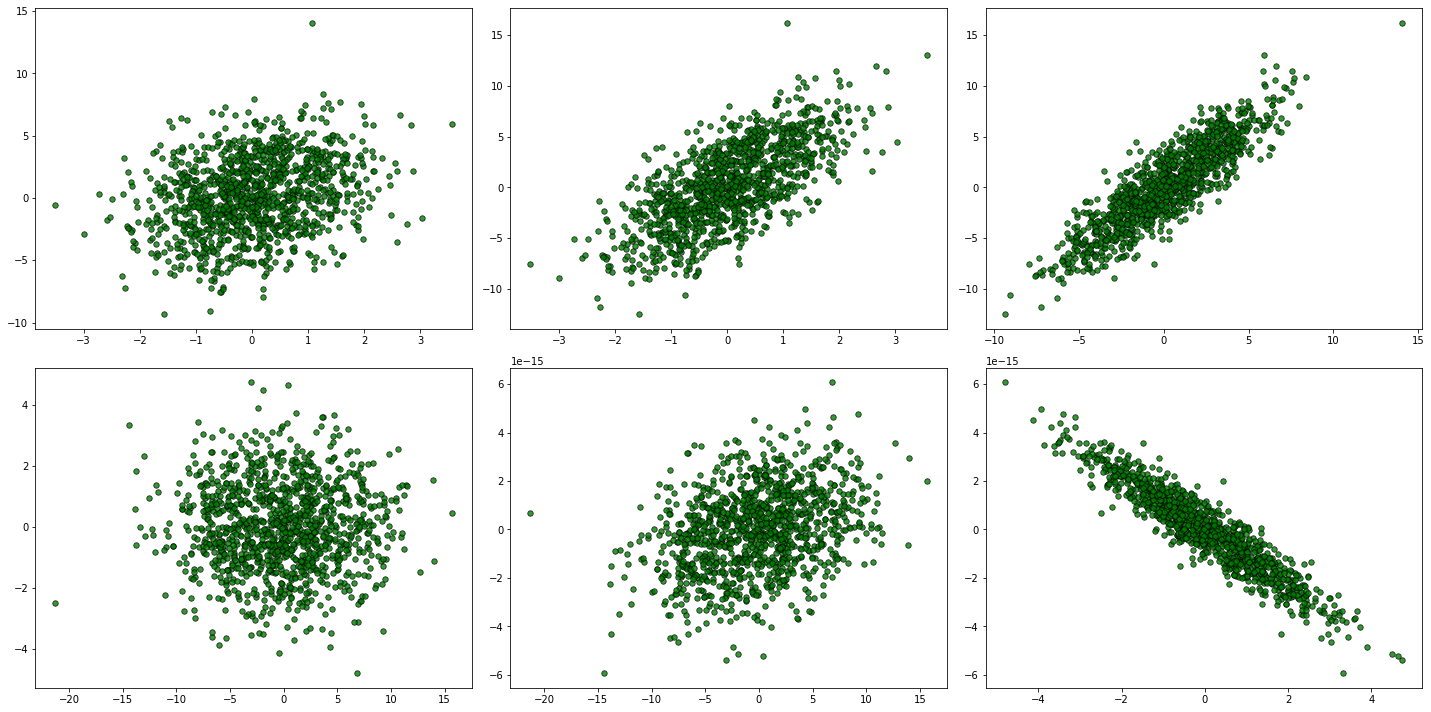

In [247]:
fig, ax = plt.subplots(nrows= 2, ncols=3, figsize=(20, 10))
ax[0,0].scatter(x=data.loc[0,:], y=data.loc[1,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
ax[0,1].scatter(x=data.loc[0,:], y=data.loc[2,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
ax[0,2].scatter(x=data.loc[1,:], y=data.loc[2,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
ax[1,0].scatter(x=datap.loc[0,:], y=datap.loc[1,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
ax[1,1].scatter(x=datap.loc[0,:], y=datap.loc[2,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
ax[1,2].scatter(x=datap.loc[1,:], y=datap.loc[2,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
fig.tight_layout()


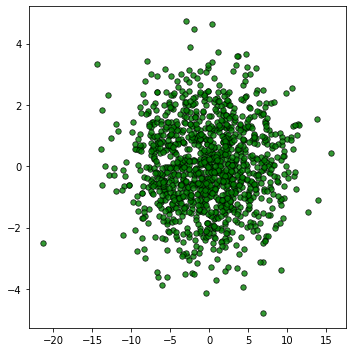

In [248]:
fig, ax = plt.subplots(nrows= 1, ncols=1, figsize=(5, 5))
ax.scatter(x=datapp.loc[0,:], y=datapp.loc[1,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
fig.tight_layout()

In [249]:
#fig, ax = plt.subplots(nrows= 2, ncols=3, figsize=(20, 10))
#ax[0,0].scatter(x=data.loc[0,:], y=data.loc[1,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
#ax[0,1].scatter(x=data.loc[0,:], y=data.loc[2,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
#ax[0,2].scatter(x=data.loc[1,:], y=data.loc[2,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
#ax[1,0].scatter(x=datap.loc[0,:], y=datap.loc[1,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
#ax[1,1].scatter(x=datap.loc[0,:], y=datap.loc[2,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
#ax[1,2].scatter(x=datap.loc[1,:], y=datap.loc[2,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
#fig.tight_layout()
#for i in range(2):
#    for j in range(3):
#        ax[i, j].scatter(x=data.loc[j%2,:], y=data.loc[1,:], s=30, c='green', edgecolors='black', linewidths=0.8, alpha=0.8, label='Data points')
#020
#111
#022
    


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [250]:
for i in range(3, 13):
    data.loc[i] = np.random.normal(loc=0, scale=1/np.random.randint(40,50), size=size)


In [251]:
data

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,-1.194624,1.393093,0.621671,1.109586,-0.845344,0.309373,0.598129,-0.919791,-0.213882,-0.603269,...,0.521897,1.888482,-0.184005,0.726701,0.350184,1.495371,0.202667,1.952311,-1.151982,0.416607
1,-2.846154,-1.665427,-1.275064,-5.693948,0.431943,-0.045829,0.218108,-0.064463,0.955765,1.348375,...,-2.189930,-1.550348,-0.224072,-0.102283,-2.425491,-0.074872,3.442972,4.580440,-4.535627,3.812834
2,-5.235403,1.120759,-0.031723,-3.474776,-1.258746,0.572918,1.414366,-1.904045,0.528002,0.141836,...,-1.146135,2.226617,-0.592081,1.351118,-1.725123,2.915871,3.848305,8.485061,-6.839590,4.646048
3,-0.040033,0.026677,0.011951,0.012431,-0.016930,0.000965,0.010052,-0.005307,-0.019287,0.017038,...,-0.020221,0.008964,-0.005065,0.015795,-0.009307,-0.025524,0.021423,0.001217,0.016754,0.023724
4,-0.020234,-0.010567,-0.003664,-0.007435,0.006912,0.055901,0.018236,0.017514,-0.008010,0.020205,...,0.053427,0.012071,-0.009839,-0.007250,-0.054136,-0.019975,0.005411,0.049843,-0.016444,0.013355
5,0.004016,0.000741,0.027899,0.002007,-0.052666,0.007877,0.026761,-0.006454,-0.024103,-0.020266,...,0.008229,-0.009437,0.022461,-0.035787,0.035241,0.019057,-0.019422,-0.006570,-0.013013,-0.020505
6,-0.014361,0.010444,-0.024115,-0.051874,-0.003203,-0.007647,-0.028815,0.036208,0.039748,0.026425,...,-0.004731,0.030518,-0.026267,-0.002643,-0.037192,0.021265,0.016545,0.034355,0.044097,-0.041724
7,0.023943,-0.020437,-0.031827,-0.013823,0.003418,0.007644,0.012470,0.006722,-0.032122,0.008939,...,0.006560,-0.000764,-0.008554,0.018195,0.004952,0.002162,-0.004848,-0.022148,-0.039844,0.006970
8,0.002960,-0.021368,-0.013323,0.016811,0.026988,-0.002713,0.010627,0.026371,0.010948,-0.031044,...,0.027029,0.003952,0.002226,0.023388,-0.007002,-0.016486,-0.051035,-0.011221,0.006965,-0.022227
9,-0.004719,-0.004101,-0.031171,0.011242,0.013369,0.006346,0.014991,-0.000444,0.001260,0.011984,...,-0.007145,-0.004415,-0.027723,0.006372,0.034923,0.016138,-0.024385,-0.005208,-0.014510,-0.006774


In [252]:
l, V = np.linalg.eig(cov_matrix)
cov_matrix = np.cov(data)
cov_matrix.shape

(13, 13)

In [253]:
l, V = np.linalg.eig(cov_matrix)

In [258]:
print('The eigenvalues with eig are: \n', l)
print('\n The eigenvectors with eig are: \n', V[:2])

The eigenvalues with eig are: 
 [ 2.45172395e+01  2.03320587e+00 -1.39260032e-15  6.70921311e-04
  4.03320435e-04  4.13695886e-04  4.53566162e-04  6.41795403e-04
  6.15411426e-04  5.25491551e-04  5.12609684e-04  5.82906262e-04
  5.73086014e-04]

 The eigenvectors with eig are: 
 [[-1.16914423e-01 -5.65387934e-01  8.16496581e-01 -3.53279986e-04
   2.76568332e-04  8.75420337e-05 -3.73791931e-05  2.01599650e-04
   5.72687199e-04 -3.99663506e-04  5.87968958e-05  2.86827969e-04
  -1.01775232e-04]
 [-5.75542354e-01  7.08577837e-01  4.08248290e-01  5.44040350e-04
  -3.43122247e-04 -2.05954746e-04  2.48197252e-05 -2.73496277e-04
  -6.90304842e-04  7.66106380e-04  8.60245017e-05 -4.22857839e-04
  -2.70909485e-05]]


In [259]:
sorting = np.argsort(l)
sorting_svd = np.argsort(l_svd)
l = l[sorting[::-1]]
V = V[:,sorting[::-1]]

In [260]:
percentages = l/cov_matrix.trace()
print(f'The percentage of the variability for each feature is: ', percentages)

The percentage of the variability for each feature is:  [ 9.23233503e-01  7.65634230e-02  2.52645503e-05  2.41677705e-05
  2.31742422e-05  2.19502114e-05  2.15804152e-05  1.97881742e-05
  1.93030881e-05  1.70797155e-05  1.55783404e-05  1.51876372e-05
 -5.24404580e-17]


In [261]:
first_to_drop = 0
for i in range(len(percentages)):
    if np.cumsum(percentages[::-1][:i+1])[-1] > 1e-2:
        first_to_drop = len(percentages)-i
        break
print('The first index to drop is: ', first_to_drop)
# So even adding the other random features, the only ones needed to retain 99%
# of the variability are the first two

The first index to drop is:  2


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [255]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 